In [0]:
#importation des bibliothèque nécessaires

from __future__ import absolute_import, division, print_function, unicode_literals

!pip install tf-nightly-gpu-2.0-preview
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
from PIL import Image
import os
import zipfile
import pathlib
AUTOTUNE = tf.data.experimental.AUTOTUNE


     |████████████████████████████████| 395.5MB 92kB/s 
     |████████████████████████████████| 450kB 46.4MB/s 
     |████████████████████████████████| 3.8MB 48.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=ecbbe2404612ca8a96cce0108301f6f07e2cc781b2fe078b36f19df10b8c8a46
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: gast 0.3.2
    Uninstalling gast-0.3.2:
      Successfully uninstalled gast-0.3.2


In [0]:
tf.__version__

'2.0.0-dev20191002'

In [0]:
#Chargement de mon drive dans l'environnement de travail de Google colaboratory

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Copie du jeu de données des maladies des plantes dans google colaboratory
cp /content/drive/My\ Drive/dataset.zip /

In [0]:
#Décompression du jeu de données
local_zip = '/dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/')
zip_ref.close()

In [0]:
#Définition des répertoires pour les données d'entrainement et les données de validation
train_dir = '/dataset/train/'
valid_dir = '/dataset/valid/'
train_dir = pathlib.Path(train_dir)
valid_dir = pathlib.Path(valid_dir)

In [0]:
%load_ext tensorboard
import datetime

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [0]:
!rm -rf ./logs/ 

In [0]:
image_count = len(list(train_dir.glob('*/*.JPG')))
image_count

67848

In [0]:
CLASS_NAMES = np.array([item.name for item in train_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

array(['Corn_(maize)___Common_rust_', 'Squash___Powdery_mildew',
       'Tomato___Target_Spot', 'Tomato___Septoria_leaf_spot',
       'Corn_(maize)___healthy', 'Peach___healthy', 'Tomato___healthy',
       'Cherry_(including_sour)___healthy', 'Grape___healthy',
       'Raspberry___healthy', 'Pepper,_bell___Bacterial_spot',
       'Tomato___Tomato_mosaic_virus', 'Grape___Esca_(Black_Measles)',
       'Apple___Cedar_apple_rust', 'Blueberry___healthy',
       'Apple___Apple_scab', 'Strawberry___Leaf_scorch',
       'Pepper,_bell___healthy', 'Soybean___healthy',
       'Tomato___Spider_mites Two-spotted_spider_mite',
       'Strawberry___healthy', 'Tomato___Leaf_Mold', 'Potato___healthy',
       'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
       'Tomato___Bacterial_spot', 'Tomato___Late_blight',
       'Potato___Early_blight', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
       'Apple___healthy', 'Grape___Black_rot',
       'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
       'Tomat

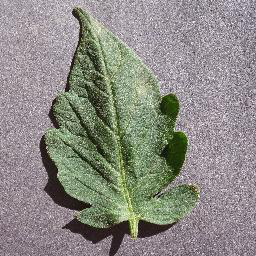

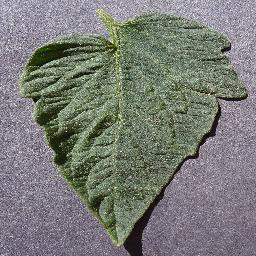

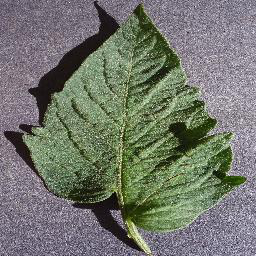

In [0]:
tomates = list(train_dir.glob('Tomato___healthy/*'))

for image_path in tomates[:3]:
    display.display(Image.open(str(image_path)))

In [0]:
BATCH_SIZE = 32
IMG_HEIGHT = 299
IMG_WIDTH = 299
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)


# The 1./255 is to convert from uint8 to float32 in range [0,1].
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_data_gen = image_generator.flow_from_directory(directory=str(train_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

test_data_gen = image_generator.flow_from_directory(directory=str(valid_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))



Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [0]:
for image_batch, label_batch in train_data_gen:
  break
image_batch.shape, label_batch.shape

((32, 299, 299, 3), (32, 38))

In [0]:
print (train_data_gen.class_indices)

labels = '\n'.join(sorted(train_data_gen.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

{'Corn_(maize)___Common_rust_': 0, 'Squash___Powdery_mildew': 1, 'Tomato___Target_Spot': 2, 'Tomato___Septoria_leaf_spot': 3, 'Corn_(maize)___healthy': 4, 'Peach___healthy': 5, 'Tomato___healthy': 6, 'Cherry_(including_sour)___healthy': 7, 'Grape___healthy': 8, 'Raspberry___healthy': 9, 'Pepper,_bell___Bacterial_spot': 10, 'Tomato___Tomato_mosaic_virus': 11, 'Grape___Esca_(Black_Measles)': 12, 'Apple___Cedar_apple_rust': 13, 'Blueberry___healthy': 14, 'Apple___Apple_scab': 15, 'Strawberry___Leaf_scorch': 16, 'Pepper,_bell___healthy': 17, 'Soybean___healthy': 18, 'Tomato___Spider_mites Two-spotted_spider_mite': 19, 'Strawberry___healthy': 20, 'Tomato___Leaf_Mold': 21, 'Potato___healthy': 22, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 23, 'Tomato___Bacterial_spot': 24, 'Tomato___Late_blight': 25, 'Potato___Early_blight': 26, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 27, 'Apple___healthy': 28, 'Grape___Black_rot': 29, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 30, 'Tomato___

In [0]:
!cat labels.txt

Apple___Apple_scab
Apple___Black_rot
Apple___Cedar_apple_rust
Apple___healthy
Blueberry___healthy
Cherry_(including_sour)___Powdery_mildew
Cherry_(including_sour)___healthy
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Corn_(maize)___Common_rust_
Corn_(maize)___Northern_Leaf_Blight
Corn_(maize)___healthy
Grape___Black_rot
Grape___Esca_(Black_Measles)
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Grape___healthy
Orange___Haunglongbing_(Citrus_greening)
Peach___Bacterial_spot
Peach___healthy
Pepper,_bell___Bacterial_spot
Pepper,_bell___healthy
Potato___Early_blight
Potato___Late_blight
Potato___healthy
Raspberry___healthy
Soybean___healthy
Squash___Powdery_mildew
Strawberry___Leaf_scorch
Strawberry___healthy
Tomato___Bacterial_spot
Tomato___Early_blight
Tomato___Late_blight
Tomato___Leaf_Mold
Tomato___Septoria_leaf_spot
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Target_Spot
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Tomato_mosaic_virus
Tomato___healthy

In [0]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(50,50))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      #plt.axis('off')

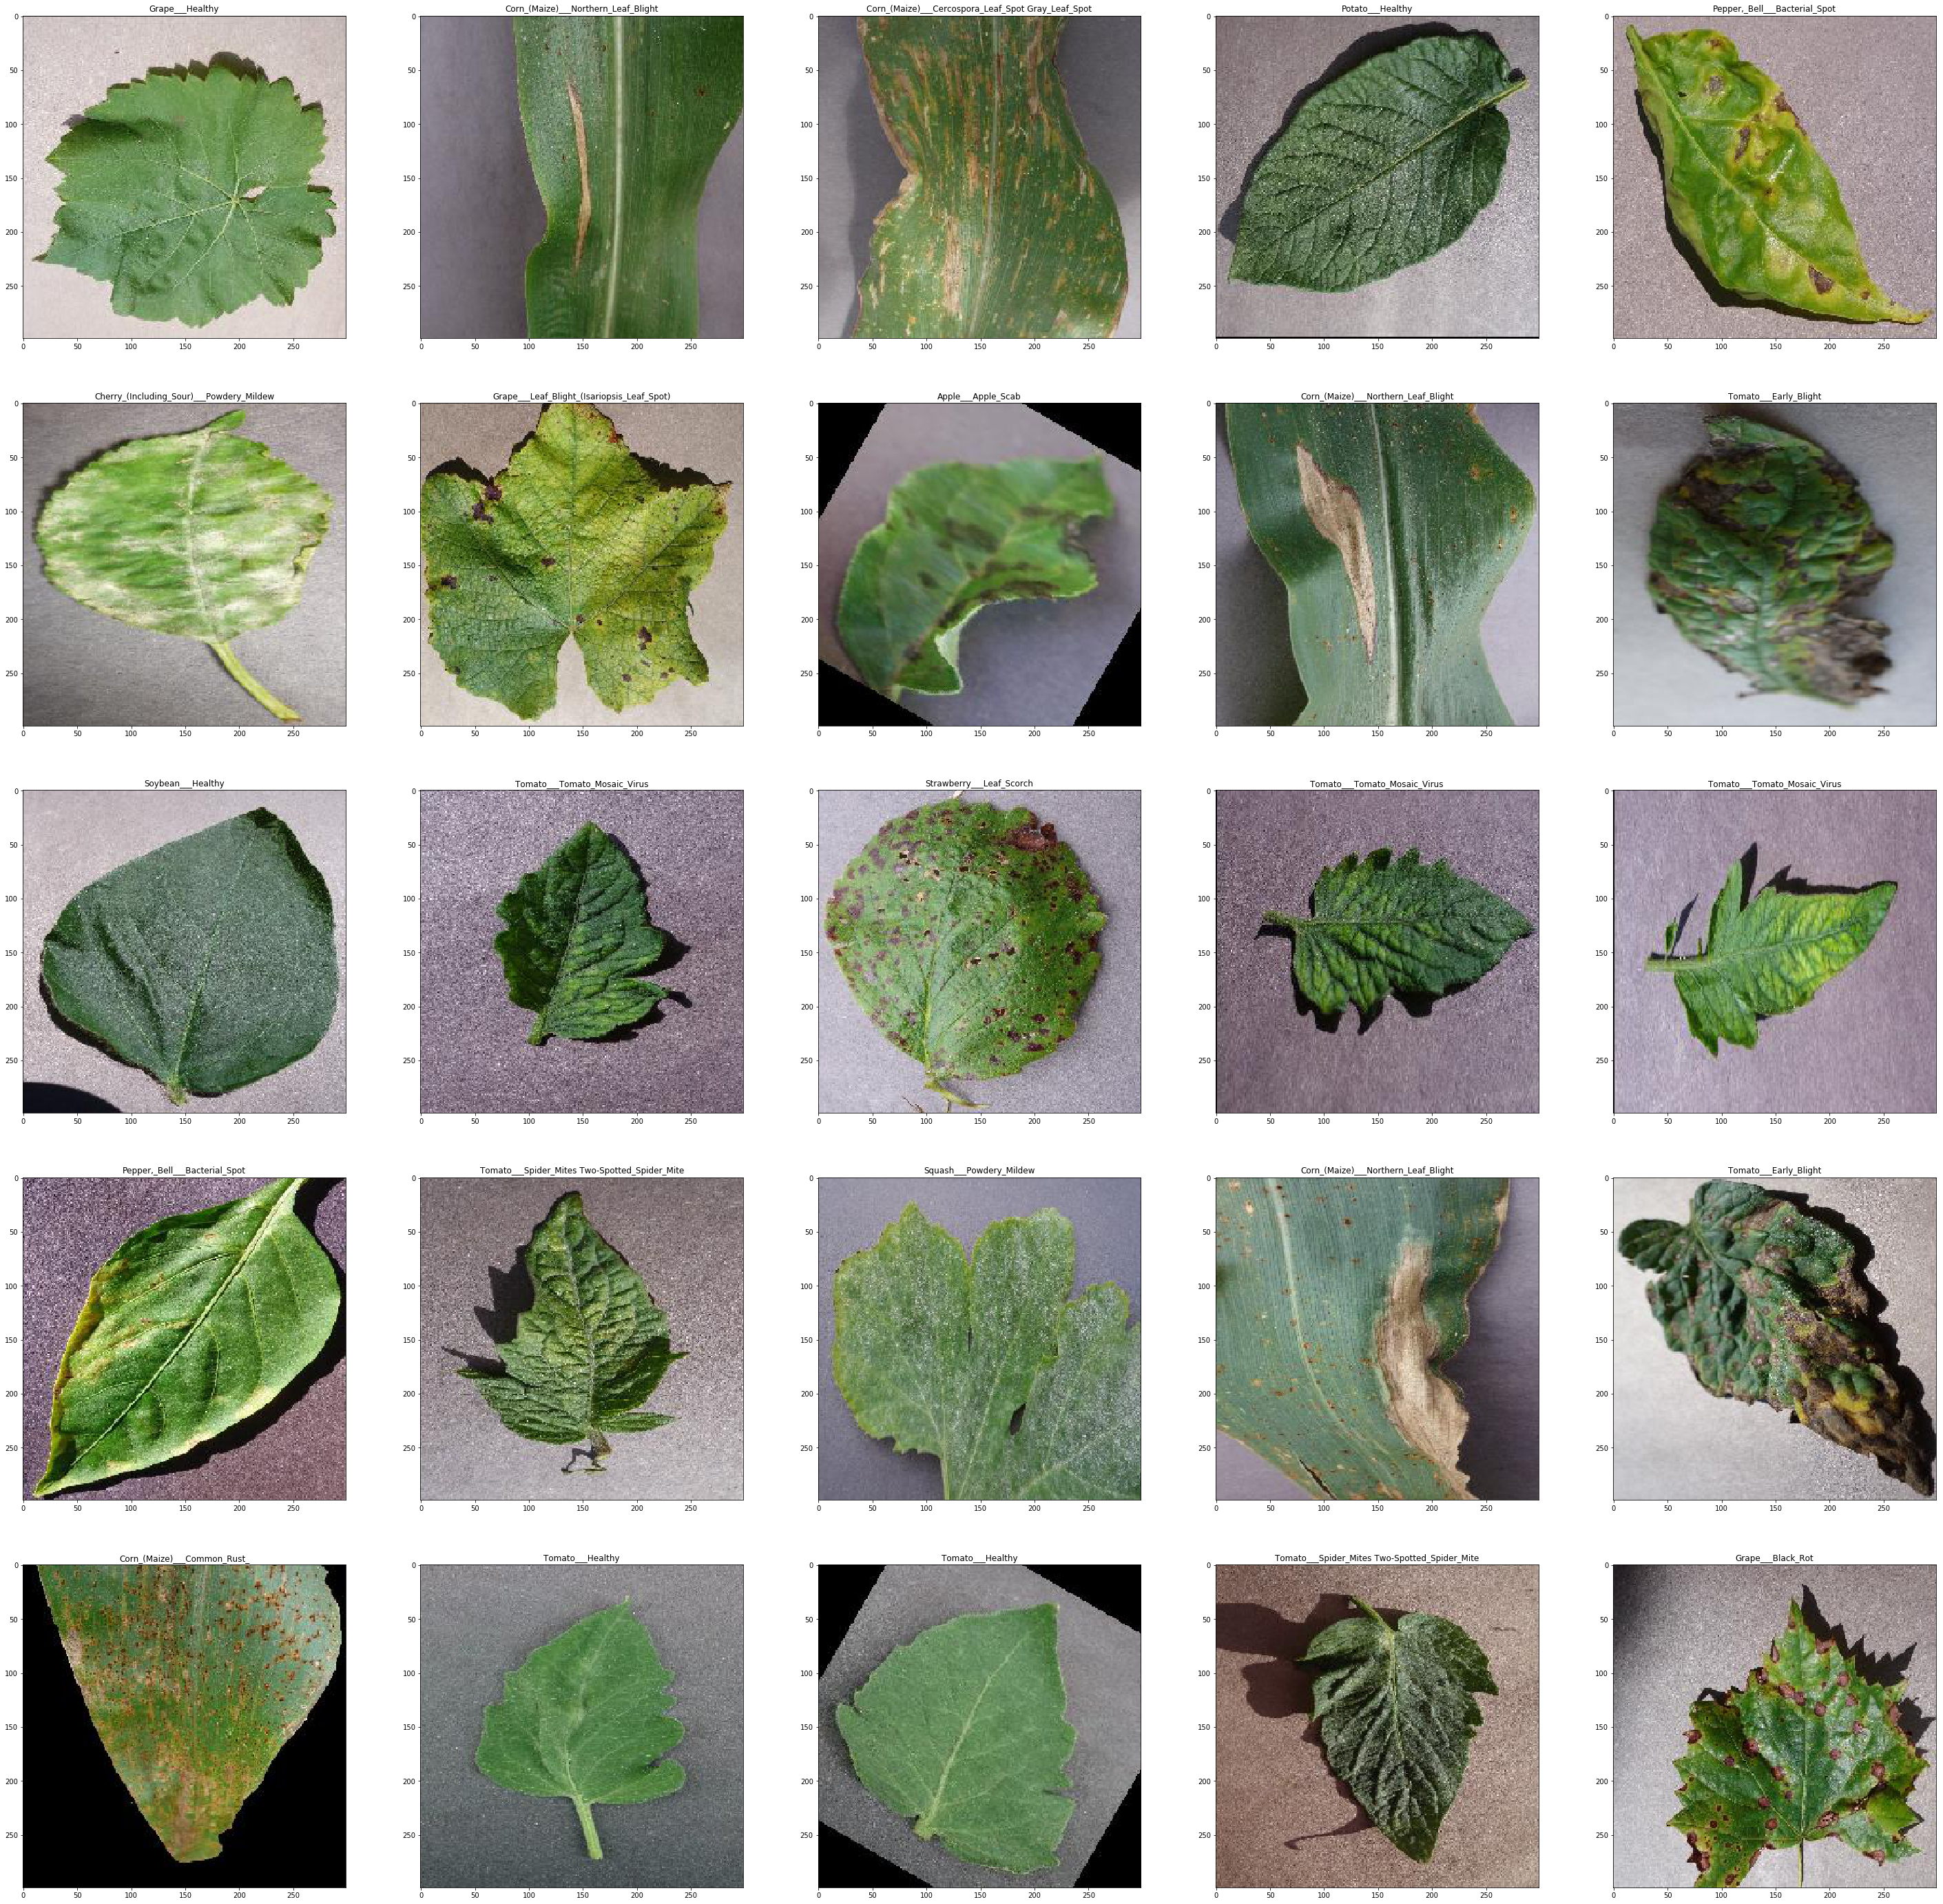

In [0]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

In [0]:
IMG_SHAPE = (IMG_HEIGHT, IMG_WIDTH, 3)

base_model = tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE, weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [0]:
base_model.trainable = False
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [0]:
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(2048, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
predictions = tf.keras.layers.Dense(38, activation='softmax')(x)

# this is the model we will train
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

In [0]:
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [0]:
history_fine = model.fit(train_data_gen, 
                         epochs=10,
                         validation_data=test_data_gen)

NameError: ignored